<a href="https://colab.research.google.com/github/arifkhan5/Tree-Visualizer/blob/main/stockperformace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Loading the dataset...
Dataset loaded successfully.

Task 2: Data Preprocessing
First few rows of X:
   ID   Large B/P    Large ROE    Large S/P   \
0   1          1.0          0.0          0.0   
1   2          0.0          1.0          0.0   
2   3          0.0          0.0          1.0   
3   4          0.0          0.0          0.0   
4   5          0.0          0.0          0.0   

    Large Return Rate in the last quarter    Large Market Value   \
0                                      0.0                   0.0   
1                                      0.0                   0.0   
2                                      0.0                   0.0   
3                                      1.0                   0.0   
4                                      0.0                   1.0   

    Small systematic Risk  Systematic Risk  Total Risk  Abs. Win Rate  \
0                     0.0             1.33        0.15           0.66   
1                     0.0             1.17     

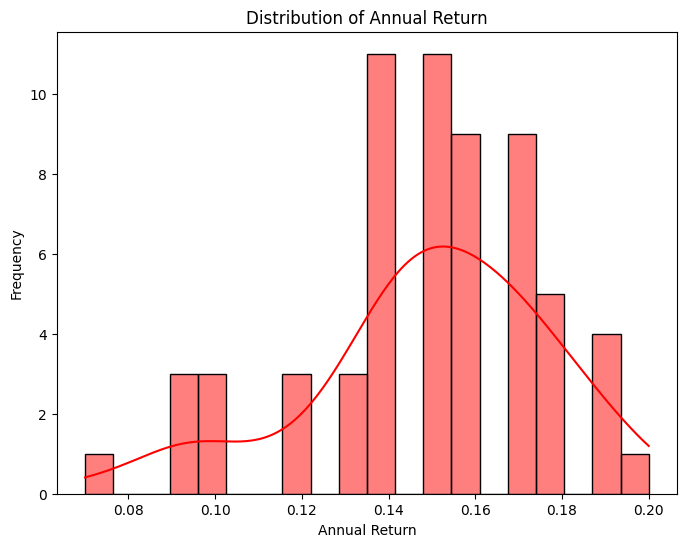

Data split into train and test sets successfully.

Task 3: Applying Regression Models


<ipython-input-2-6809634e8de4>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='pastel')


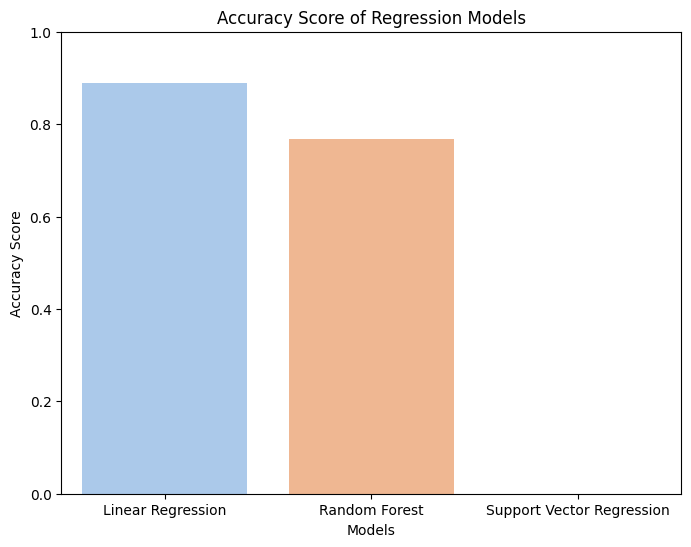

Results of Regression Models:
 {'Linear Regression': 0.888256378230354, 'Random Forest': 0.766943785310736, 'Support Vector Regression': -0.03972457627118686} 

Task 4: Applying Hyperparameter Tuning


<ipython-input-2-6809634e8de4>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tuned_results.keys()), y=list(tuned_results.values()), palette='pastel')


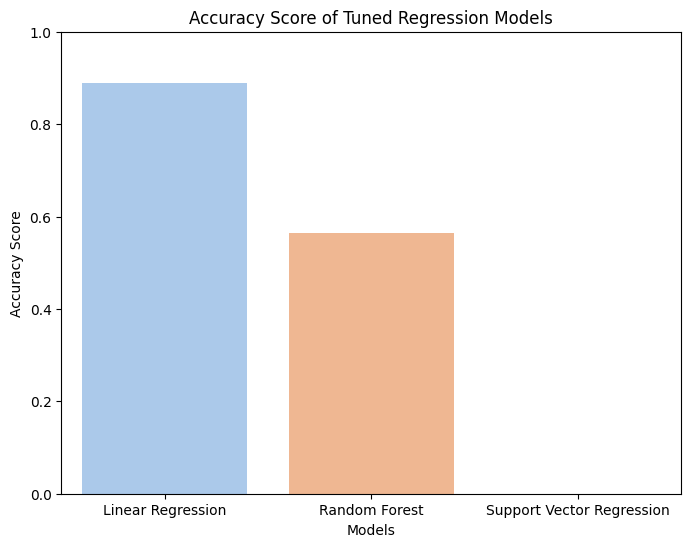

Tuned Results of Regression Models:
 {'Linear Regression': 0.888256378230354, 'Random Forest': 0.5651004144164992, 'Support Vector Regression': -0.34618657444407885} 

Task 5: Comparing the Results
Comparison between Results and Tuned Results:
Linear Regression: 0.8883 (Before tuning) | 0.8883 (After tuning)
Random Forest: 0.7669 (Before tuning) | 0.5651 (After tuning)
Support Vector Regression: -0.0397 (Before tuning) | -0.3462 (After tuning)


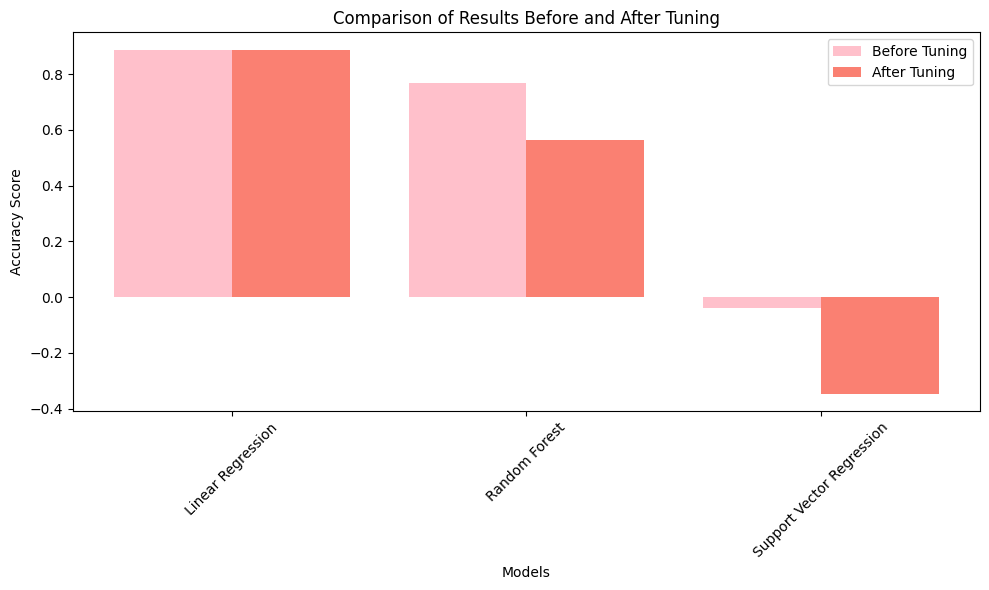

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
print("Step 1: Loading the dataset...")
data = pd.read_csv('stocknew.csv')
print("Dataset loaded successfully.\n")

# Task 2: Apply Data Preprocessing
print("Task 2: Data Preprocessing")
# Split features and target variable
X = data.drop(columns=['Annual Return', 'Excess Return'])
y = data['Annual Return']

# Print first few rows of X and y to check
print("First few rows of X:")
print(X.head())
print("\nFirst few rows of y:")
print(y.head())

# Print summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(X.describe())

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True, color='red')
plt.title('Distribution of Annual Return')
plt.xlabel('Annual Return')
plt.ylabel('Frequency')
plt.show()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into train and test sets successfully.\n")

# Task 3: Apply Regression Models
print("Task 3: Applying Regression Models")
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = model.score(X_test_scaled, y_test)
    results[name] = score

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='pastel')
plt.title('Accuracy Score of Regression Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()
print("Results of Regression Models:\n", results, "\n")

# Task 4: Apply Hyperparameter Tuning
print("Task 4: Applying Hyperparameter Tuning")
# Define hyperparameters for each model
params = {
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
    'Support Vector Regression': {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
}

# Perform hyperparameter tuning
tuned_results = {}
for name, model in models.items():
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5)
        grid_search.fit(X_train_scaled, y_train)
        tuned_results[name] = grid_search.best_score_
    else:
        tuned_results[name] = results[name]

# Plot the tuned results
plt.figure(figsize=(8, 6))
sns.barplot(x=list(tuned_results.keys()), y=list(tuned_results.values()), palette='pastel')
plt.title('Accuracy Score of Tuned Regression Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.show()
print("Tuned Results of Regression Models:\n", tuned_results, "\n")

# Task 5: Compare the Results
print("Task 5: Comparing the Results")
# Print comparison between results and tuned results
print("Comparison between Results and Tuned Results:")
for model, result in results.items():
    print(f"{model}: {result:.4f} (Before tuning) | {tuned_results[model]:.4f} (After tuning)")

# Plot comparison between results and tuned results
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(results)) - 0.2, list(results.values()), width=0.4, label='Before Tuning', color='pink')
plt.bar(np.arange(len(tuned_results)) + 0.2, list(tuned_results.values()), width=0.4, label='After Tuning', color='salmon')
plt.xticks(np.arange(len(results)), list(results.keys()), rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Results Before and After Tuning')
plt.legend()
plt.tight_layout()
plt.show()
